<a href="https://colab.research.google.com/github/Sravya0901/CarPricePrediction/blob/main/CarPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaning of train data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
train=pd.read_csv('train.csv')
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
train.shape

(6019, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
print("Missing values distribution: ")
print(train.isnull().mean())
print("")

Missing values distribution: 
Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64



In [ ]:
train.groupby('Seats')['Price'].nunique()

Seats
0.0        1
2.0       15
4.0       81
5.0     1161
6.0       30
7.0      390
8.0       97
9.0        3
10.0       4
Name: Price, dtype: int64

In [ ]:
train.groupby('Mileage')['Price'].nunique()

Mileage
0.0 kmpl      59
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: Price, Length: 442, dtype: int64

In [ ]:
train.groupby('Engine')['Price'].nunique()

Engine
1047 CC      4
1061 CC     23
1086 CC     69
1120 CC     37
1150 CC      7
          ... 
970 CC       1
993 CC      12
995 CC       8
998 CC     117
999 CC      26
Name: Price, Length: 146, dtype: int64

In [ ]:
train.groupby('Power')['Price'].nunique()

Power
100 bhp      48
100.6 bhp    33
101 bhp       4
102 bhp      50
102.5 bhp     8
             ..
98.82 bhp     2
98.96 bhp     8
99 bhp       17
99.6 bhp      5
null bhp     74
Name: Price, Length: 372, dtype: int64

In [ ]:
train['Mileage'] = train['Mileage'].str.replace(' km/kg', '')
train['Mileage'] = train['Mileage'].str.replace(' kmpl', '')
train['Mileage'] = pd.to_numeric(train['Mileage'], errors='coerce')

In [ ]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
train['Engine'] = train['Engine'].str.replace(' CC', '')
train['Engine'] = pd.to_numeric(train['Engine'], errors='coerce')

In [ ]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74


In [ ]:
train['Power'] = train['Power'].str.replace(' bhp', '')
train['Power'] = train['Power'].str.replace('null', '0.0')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce')

In [ ]:
train['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(train['Mileage']))
train['Mileage'].fillna(value=np.mean(train['Mileage']),inplace=True)

Mean of Mileage = 18.342252479408305


In [ ]:
train['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(train['Power']))
train['Power'].fillna(value=np.mean(train['Power']),inplace=True)

Mean of Power = 113.25304969366915


In [ ]:
train['Seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats = ",np.mean(train['Seats']))
train['Seats'].fillna(value=np.mean(train['Seats']),inplace=True)

Mean of Seats =  5.2796184738955825


In [ ]:
train['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine = ",np.mean(train['Engine']))
train['Engine'].fillna(value=np.mean(train['Engine']),inplace=True)

Mean of Engine =  1621.276449941501


In [ ]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


In [ ]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,1737.679967,3.269742,9.126884e+04,4.151120,599.553865,53.231019,0.803134,11.187917
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.342252,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Cleaning of testing data

In [ ]:
test=pd.read_csv('test.csv')
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
test.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
test['Mileage'] = test['Mileage'].str.replace(' km/kg', '')
test['Mileage'] = test['Mileage'].str.replace(' kmpl', '')
test['Mileage'] = pd.to_numeric(test['Mileage'], errors='coerce')

In [ ]:
test['Engine'] = test['Engine'].str.replace(' CC', '')
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')

In [ ]:
test['Power'] = test['Power'].str.replace(' bhp', '')
test['Power'] = test['Power'].str.replace('null', '0.0')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

In [ ]:
test['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(test['Mileage']))
test['Mileage'].fillna(value=np.mean(test['Mileage']),inplace=True)

Mean of Mileage = 18.36735462735463


In [ ]:
test['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(test['Engine']))
test['Engine'].fillna(value=np.mean(test['Engine']),inplace=True)

Mean of Engine = 1593.5849673202615


In [ ]:
test['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(test['Power']))
test['Power'].fillna(value=np.mean(test['Power']),inplace=True)

Mean of Power = 110.38042013311147


In [ ]:
test['Seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats =",np.mean(test['Seats']))
test['Seats'].fillna(value=np.mean(test['Seats']),inplace=True)

Mean of Seats = 5.28454619787408


In [ ]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   float64
 9   Engine             1234 non-null   float64
 10  Power              1234 non-null   float64
 11  Seats              1234 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 125.5+ KB


In [ ]:
test['New_Price'] = test['New_Price'].replace(np.nan, 0)

In [ ]:
test.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

EDA:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,1737.679967,3.269742,9.126884e+04,4.151120,599.553865,53.231019,0.803134,11.187917
min,0.000000,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.342252,1493.000000,98.600000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [ ]:
train.Location.nunique()

11

In [ ]:
train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
train.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<Axes: ylabel='Location'>

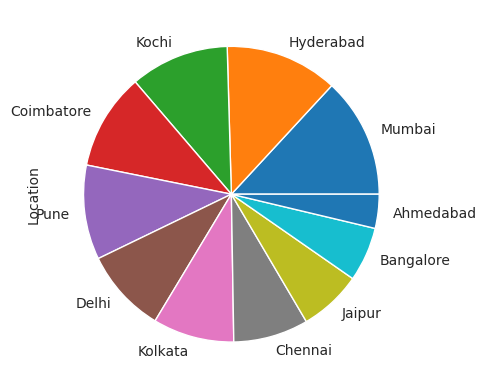

In [ ]:
train['Location'].value_counts().plot.pie()

<Axes: >

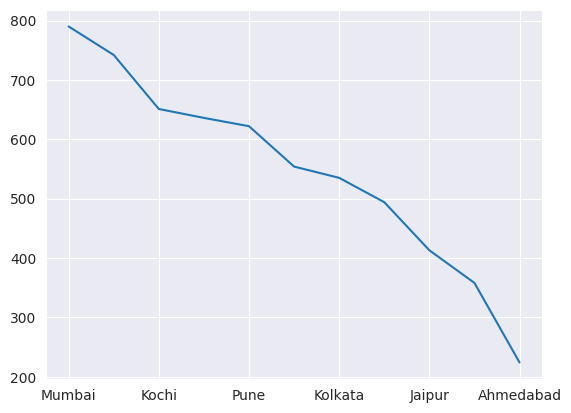

In [ ]:
train.Location.value_counts().plot()

In [ ]:
train.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

<Axes: >

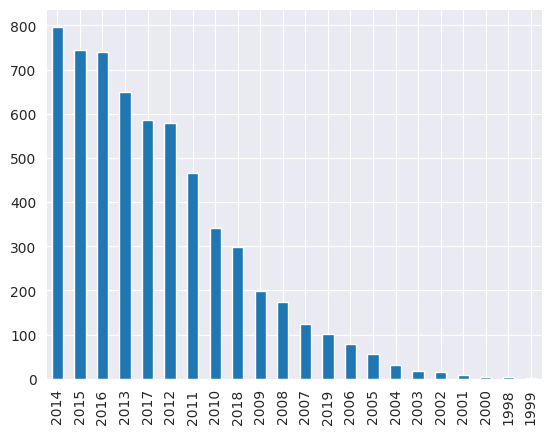

In [ ]:
train.Year.value_counts().plot(kind='bar')


<Axes: ylabel='Frequency'>

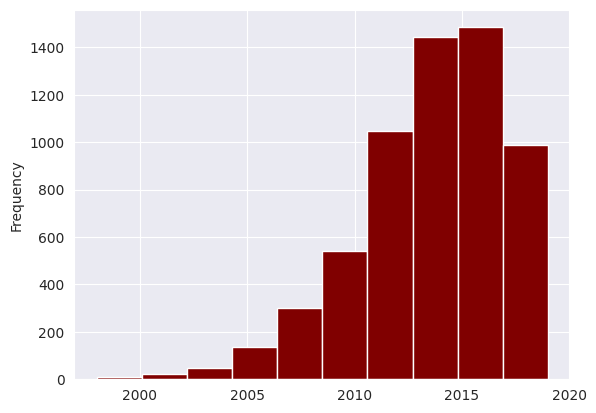

In [ ]:
train.Year.plot(kind='hist',color='Maroon')

In [ ]:
print("Mean kilometers driven in the data is:",train.Kilometers_Driven.mean())

Mean kilometers driven in the data is: 58738.38029573019


In [ ]:
print("Maximum kilometers driven in the data is:",train.Kilometers_Driven.max())

Maximum kilometers driven in the data is: 6500000


In [ ]:
print("Minimum kilometers driven in the data is:",train.Kilometers_Driven.min())

Minimum kilometers driven in the data is: 171


<Axes: ylabel='Frequency'>

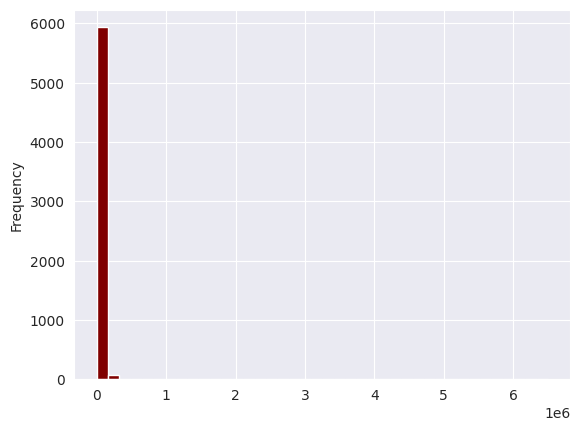

In [ ]:
train.Kilometers_Driven.plot(kind='hist',color='Maroon',bins=40)

In [ ]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

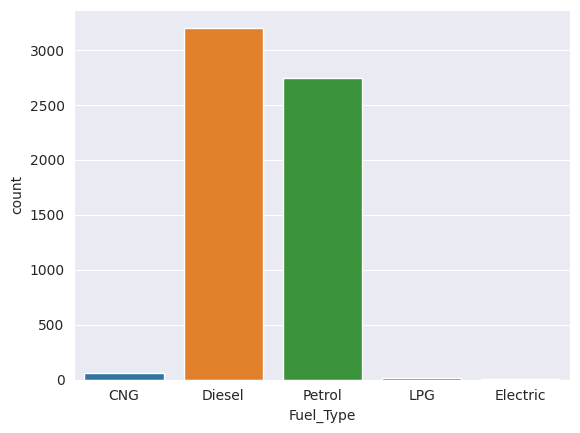

In [ ]:
sns.countplot(data=train,x='Fuel_Type')

<Axes: >

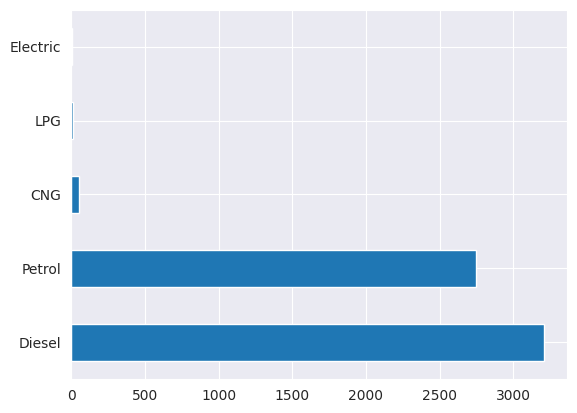

In [ ]:
train.Fuel_Type.value_counts().plot(kind='barh')

In [ ]:
cat_cols=train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'New_Price'],
      dtype='object')
Numerical Variables:
['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


Unnamed: 0
Skew : 0.0


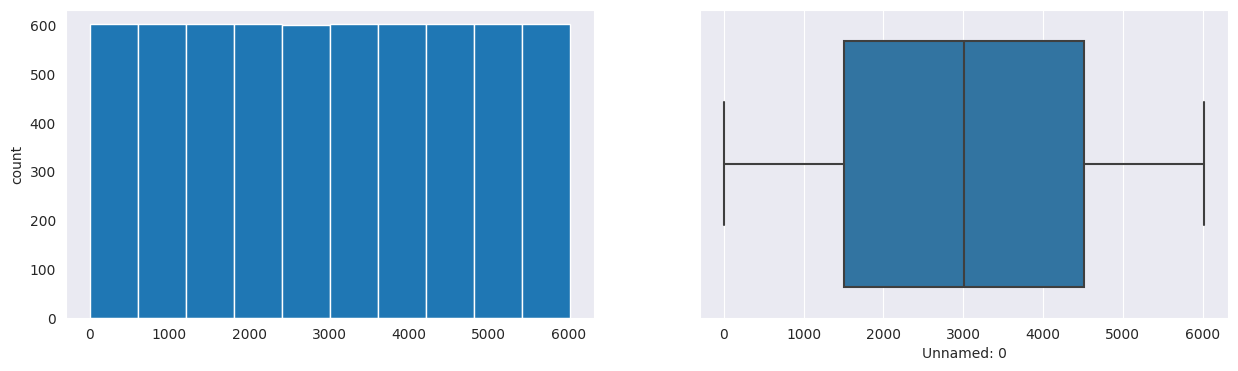

Year
Skew : -0.85


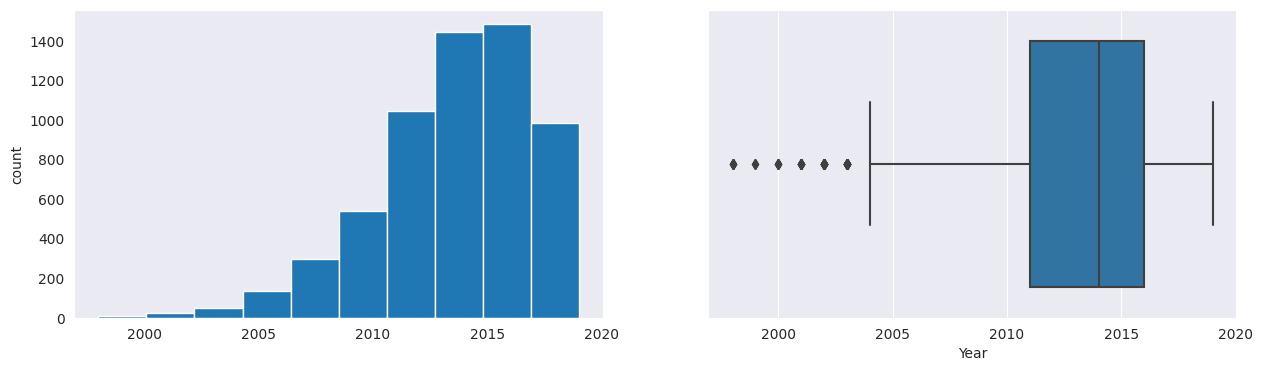

Kilometers_Driven
Skew : 58.72


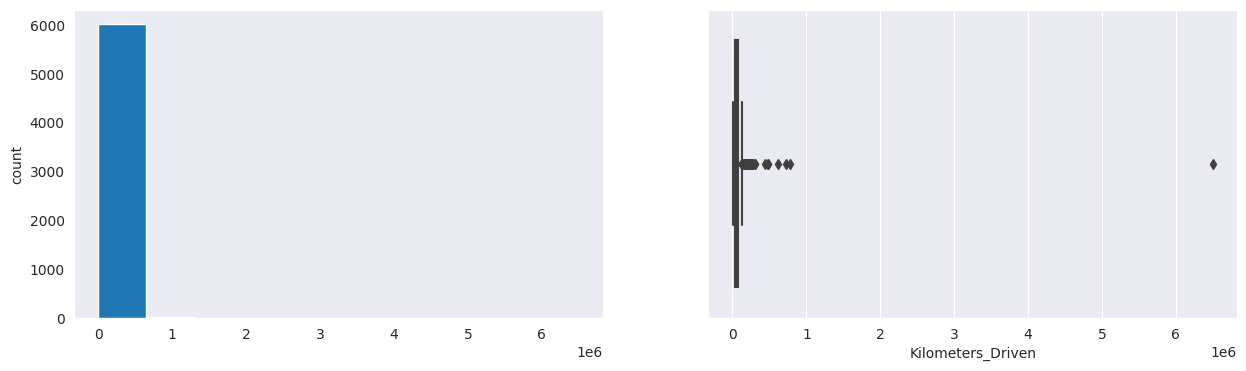

Mileage
Skew : 0.21


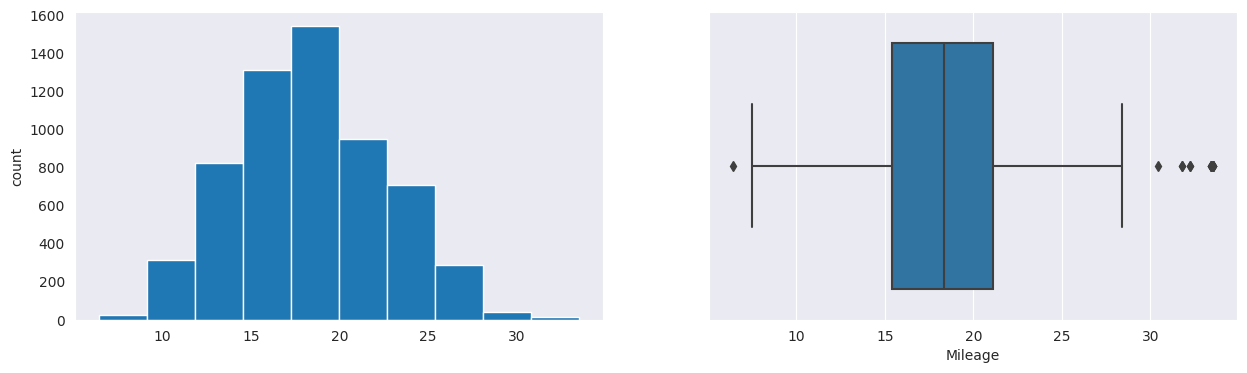

Engine
Skew : 1.43


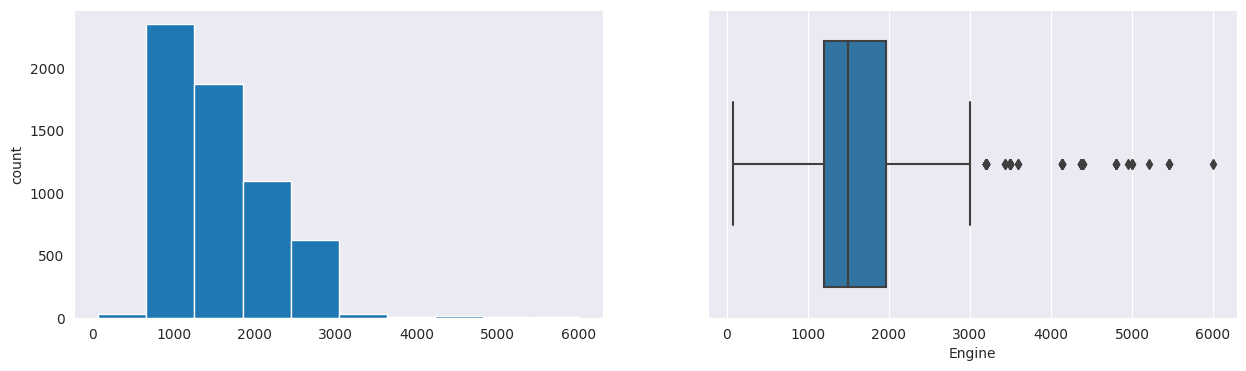

Power
Skew : 1.94


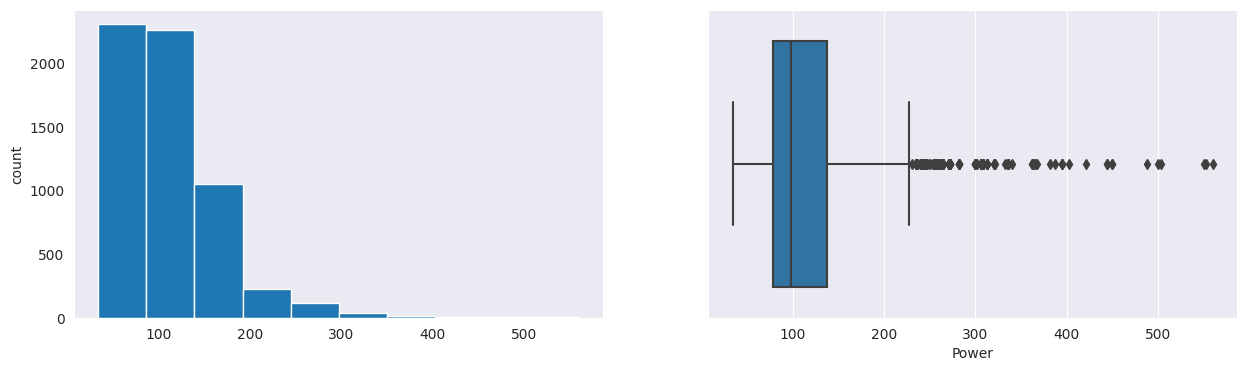

Seats
Skew : 1.91


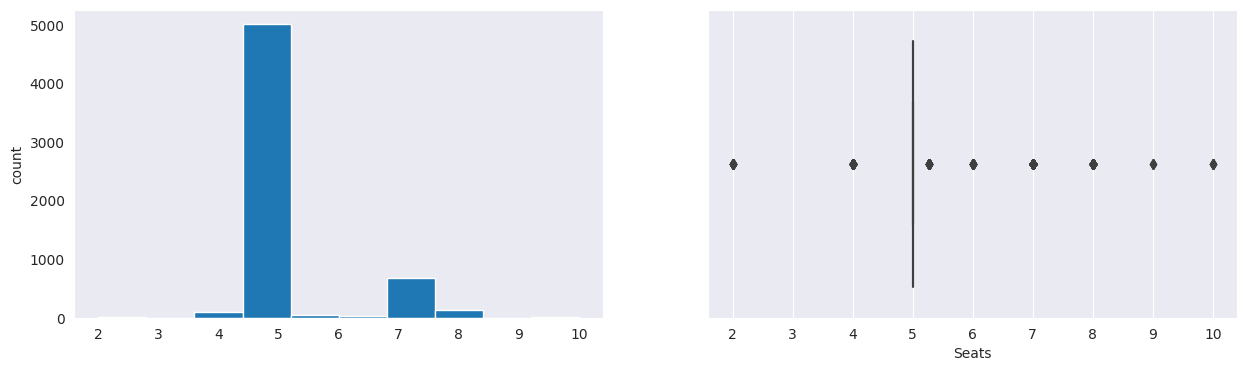

Price
Skew : 3.34


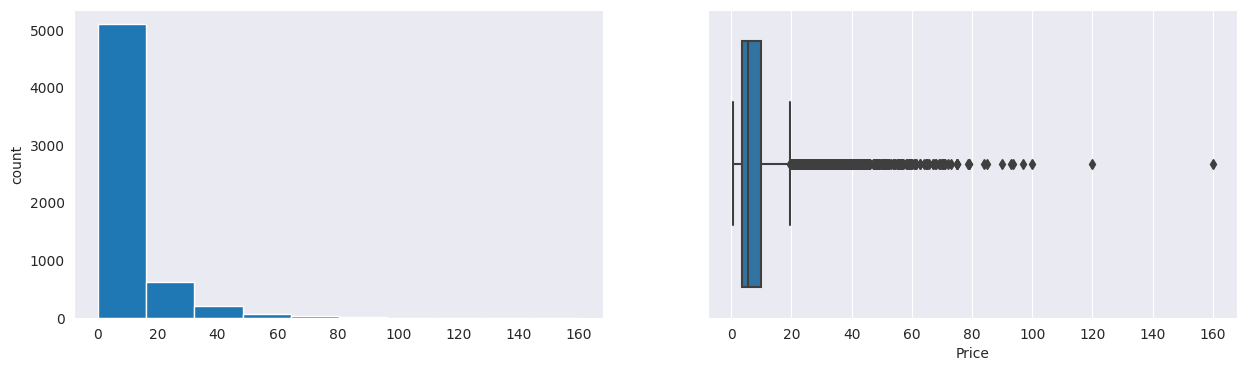

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6019 non-null   int64  
 1   Name                   6019 non-null   object 
 2   Location               6019 non-null   object 
 3   Year                   6019 non-null   int64  
 4   Kilometers_Driven      6019 non-null   int64  
 5   Fuel_Type              6019 non-null   object 
 6   Transmission           6019 non-null   object 
 7   Owner_Type             6019 non-null   object 
 8   Mileage                6019 non-null   float64
 9   Engine                 6019 non-null   float64
 10  Power                  6019 non-null   float64
 11  Seats                  6019 non-null   float64
 12  New_Price              824 non-null    object 
 13  Price                  6019 non-null   float64
 14  Kilometers_Driven_log  6019 non-null   float64
 15  Pric

<ipython-input-57-620461754600>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");


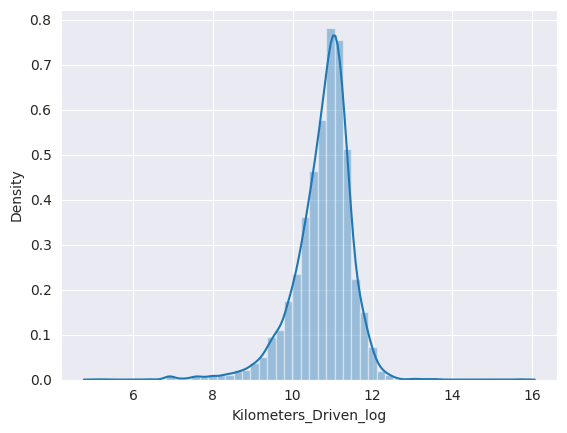

In [ ]:
# Function for log transformation of the column
def log_transform(train,col):
    for colname in col:
        if (train[colname] == 1.0).all():
            train[colname + '_log'] = np.log(train[colname]+1)
        else:
            train[colname + '_log'] = np.log(train[colname])
    train.info()
log_transform(train,['Kilometers_Driven','Price'])
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(train["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

<ipython-input-58-6c2319ab74f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Price_log"], axlabel="Price_log");


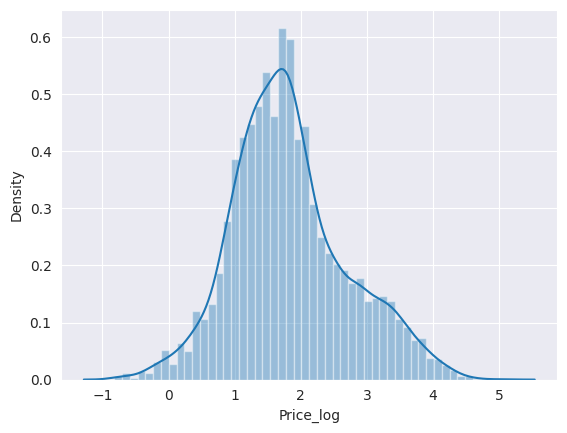

In [ ]:
sns.distplot(train["Price_log"], axlabel="Price_log");

Comparision with other patterns:

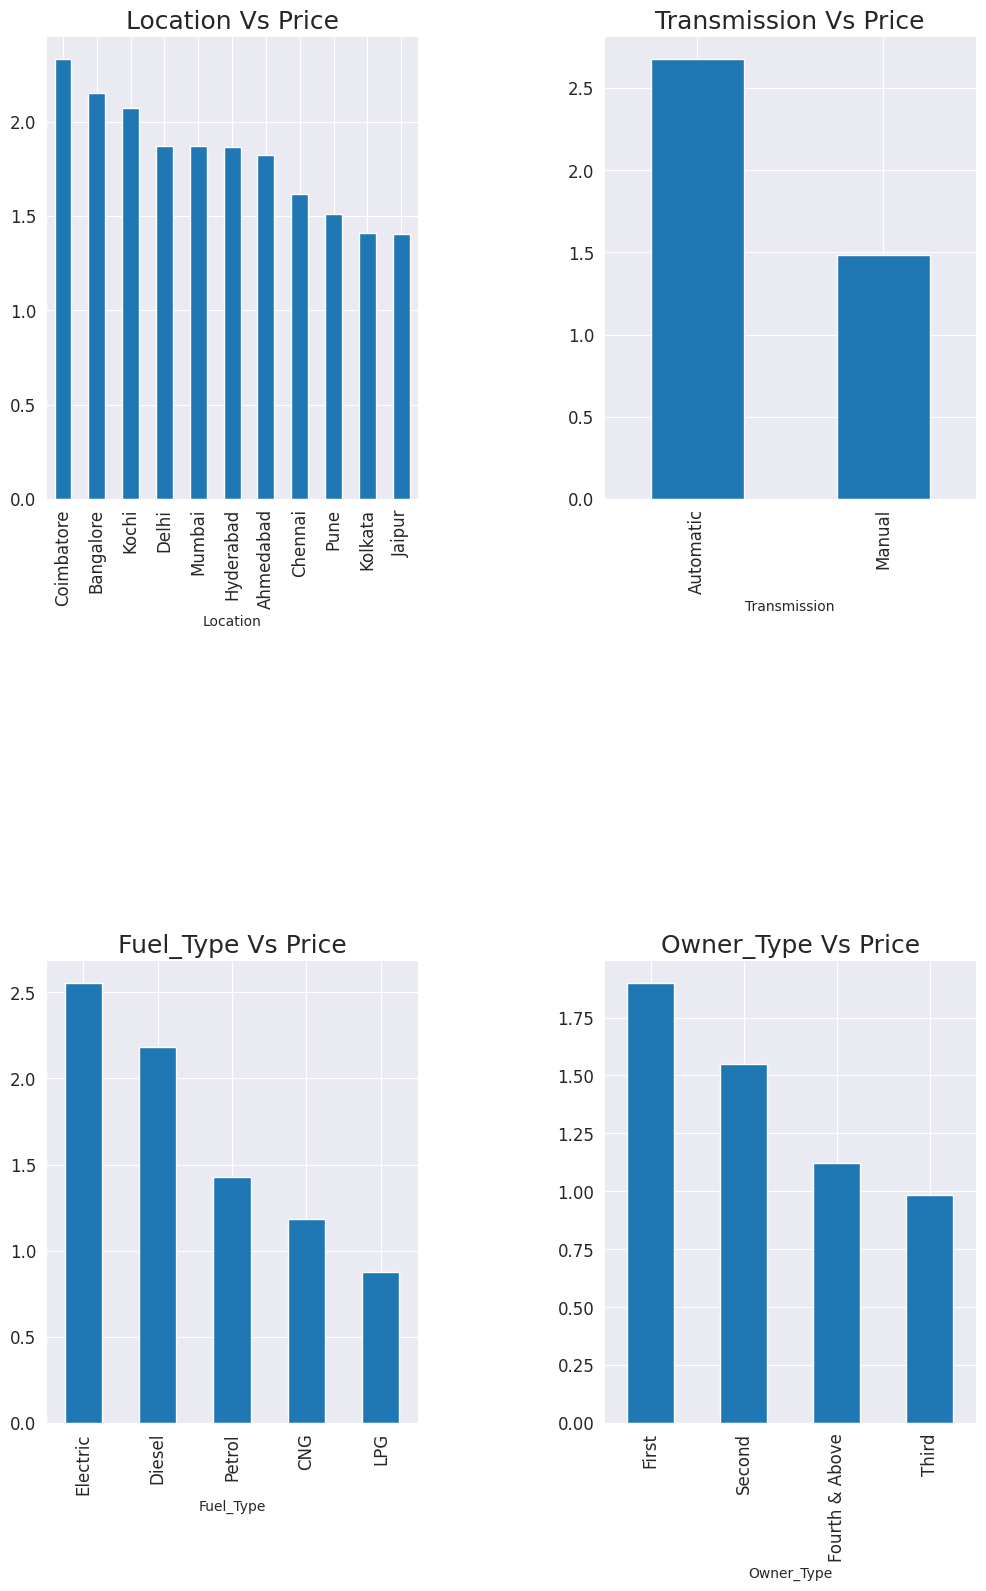

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 18))
train.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
train.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
train.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
train.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

**Labeling:**

In [ ]:
train.Name.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [ ]:
namemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Name']))}
namemapping.update({"Not Applicable": 0})
invnamemapping = {v : x for x, v in namemapping.items()}
train['Name'] = train['Name'].map(namemapping).astype(float)
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1201.0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,513.0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,487.0,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,1060.0,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,24.0,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,1160.0,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,6015,669.0,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,6016,933.0,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,6017,1208.0,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
locationmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Location']))}
locationmapping.update({"null": 0})
invlocationmapping = {v : x for x, v in locationmapping.items()}
train['Location'] = train['Location'].map(locationmapping).astype(float)
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1201.0,10.0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,513.0,11.0,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,487.0,3.0,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,1060.0,3.0,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,24.0,4.0,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,1160.0,5.0,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,6015,669.0,7.0,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,6016,933.0,7.0,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,6017,1208.0,9.0,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
locationmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Location']))}
locationmapping.update({"null": 0})
invlocationmapping = {v : x for x, v in locationmapping.items()}
train['Location'] = train['Location'].map(locationmapping).astype(float)

In [ ]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
fueltypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Fuel_Type']))}
fueltypemapping.update({"null": 0})
invfueltypemapping = {v : x for x, v in fueltypemapping.items()}
train['Fuel_Type'] = train['Fuel_Type'].map(fueltypemapping).astype(float)


In [ ]:
train.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
transmissionmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Transmission']))}
transmissionmapping.update({"null": 0})
invtransmissionmapping = {v : x for x, v in transmissionmapping.items()}
train['Transmission'] = train['Transmission'].map(transmissionmapping).astype(float)
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1201.0,10.0,2010,72000,1.0,2.0,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,513.0,11.0,2015,41000,2.0,2.0,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,487.0,3.0,2011,46000,5.0,2.0,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,1060.0,3.0,2012,87000,2.0,2.0,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,24.0,4.0,2013,40670,2.0,1.0,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,1160.0,5.0,2014,27365,2.0,2.0,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,6015,669.0,7.0,2015,100000,2.0,2.0,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,6016,933.0,7.0,2012,55000,2.0,2.0,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,6017,1208.0,9.0,2013,46000,5.0,2.0,First,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
train.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
ownertypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Owner_Type']))}
ownertypemapping.update({"null": 0 })
invownertypemapping = {v : x for x, v in ownertypemapping.items()}
train['Owner_Type'] = train['Owner_Type'].map(ownertypemapping).astype(float)
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1201.0,10.0,2010,72000,1.0,2.0,1.0,26.60,998.0,58.16,5.0,NaN,1.75
1,1,513.0,11.0,2015,41000,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,487.0,3.0,2011,46000,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,1060.0,3.0,2012,87000,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,24.0,4.0,2013,40670,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,1160.0,5.0,2014,27365,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,6015,669.0,7.0,2015,100000,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,NaN,4.00
6016,6016,933.0,7.0,2012,55000,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,NaN,2.90
6017,6017,1208.0,9.0,2013,46000,5.0,2.0,1.0,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
yearmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Year']))}
yearmapping.update({0: 0})
invyearmapping = {v : x for x, v in yearmapping.items()}
train['Year'] = train['Year'].map(yearmapping).astype(float)
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1201.0,10.0,13.0,72000,1.0,2.0,1.0,26.60,998.0,58.16,5.0,NaN,1.75
1,1,513.0,11.0,18.0,41000,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,487.0,3.0,14.0,46000,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,1060.0,3.0,15.0,87000,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,24.0,4.0,16.0,40670,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,1160.0,5.0,17.0,27365,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,6015,669.0,7.0,18.0,100000,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,NaN,4.00
6016,6016,933.0,7.0,15.0,55000,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,NaN,2.90
6017,6017,1208.0,9.0,16.0,46000,5.0,2.0,1.0,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
drivenmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Kilometers_Driven']))}
drivenmapping.update({0: 0})
invdrivenmapping = {v : x for x, v in drivenmapping.items()}
train['Kilometers_Driven'] = train['Kilometers_Driven'].map(drivenmapping).astype(float)
train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,1201.0,10.0,13.0,2363.0,1.0,2.0,1.0,26.60,998.0,58.16,5.0,NaN,1.75
1,1,513.0,11.0,18.0,1129.0,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,487.0,3.0,14.0,1357.0,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,1060.0,3.0,15.0,2694.0,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,24.0,4.0,16.0,1121.0,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,1160.0,5.0,17.0,597.0,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,6015,669.0,7.0,18.0,2829.0,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,NaN,4.00
6016,6016,933.0,7.0,15.0,1710.0,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,NaN,2.90
6017,6017,1208.0,9.0,16.0,1357.0,5.0,2.0,1.0,18.90,998.0,67.10,5.0,NaN,2.65


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   float64
 2   Location           6019 non-null   float64
 3   Year               6019 non-null   float64
 4   Kilometers_Driven  6019 non-null   float64
 5   Fuel_Type          6019 non-null   float64
 6   Transmission       6019 non-null   float64
 7   Owner_Type         6019 non-null   float64
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 658.5+ KB


In [ ]:
test['Name'] = test['Name'].map(namemapping).astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,0
1,1,953.0,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,0
2,2,NaN,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,0
4,4,759.0,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Location'] = test['Location'].map(locationmapping).astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,NaN,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,0
1,1,953.0,NaN,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,0
2,2,NaN,NaN,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,NaN,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,0
4,4,759.0,NaN,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Fuel_Type'] = test['Fuel_Type'].map(fueltypemapping).astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,NaN,2014,40929,1.0,Manual,First,32.26,998.0,58.20000,4.0,0
1,1,953.0,NaN,2013,54493,5.0,Manual,Second,24.70,796.0,47.30000,5.0,0
2,2,NaN,NaN,2017,34000,2.0,Manual,First,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,NaN,2012,139000,2.0,Manual,First,23.59,1364.0,110.38042,5.0,0
4,4,759.0,NaN,2014,29000,5.0,Manual,First,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,NaN,2011,89411,2.0,Manual,First,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,NaN,2015,59000,5.0,Automatic,First,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,NaN,2012,28000,2.0,Manual,First,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,NaN,2013,52262,5.0,Automatic,Third,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Transmission'] = test['Transmission'].map(transmissionmapping).astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,NaN,2014,40929,1.0,2.0,First,32.26,998.0,58.20000,4.0,0
1,1,953.0,NaN,2013,54493,5.0,2.0,Second,24.70,796.0,47.30000,5.0,0
2,2,NaN,NaN,2017,34000,2.0,2.0,First,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,NaN,2012,139000,2.0,2.0,First,23.59,1364.0,110.38042,5.0,0
4,4,759.0,NaN,2014,29000,5.0,2.0,First,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,NaN,2011,89411,2.0,2.0,First,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,NaN,2015,59000,5.0,1.0,First,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,NaN,2012,28000,2.0,2.0,First,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,NaN,2013,52262,5.0,1.0,Third,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Owner_Type'] = test['Owner_Type'].map(ownertypemapping).astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,NaN,2014,40929,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,0
1,1,953.0,NaN,2013,54493,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,0
2,2,NaN,NaN,2017,34000,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,NaN,2012,139000,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,0
4,4,759.0,NaN,2014,29000,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,NaN,2011,89411,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,NaN,2015,59000,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,NaN,2012,28000,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,NaN,2013,52262,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Year'] = test['Year'].astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,NaN,2014.0,40929,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,0
1,1,953.0,NaN,2013.0,54493,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,0
2,2,NaN,NaN,2017.0,34000,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,NaN,2012.0,139000,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,0
4,4,759.0,NaN,2014.0,29000,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,NaN,2011.0,89411,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,NaN,2015.0,59000,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,NaN,2012.0,28000,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,NaN,2013.0,52262,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Kilometers_Driven'] = test['Kilometers_Driven'].astype(float)
test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,963.0,NaN,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,0
1,1,953.0,NaN,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,0
2,2,NaN,NaN,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,25.27 Lakh
3,3,1720.0,NaN,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,0
4,4,759.0,NaN,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,1850.0,NaN,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,0
1230,1230,1829.0,NaN,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,0
1231,1231,1379.0,NaN,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,0
1232,1232,1829.0,NaN,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,0


In [ ]:
test['Name'].fillna(0.0, inplace=True)
test['Location'].fillna(0.0, inplace=True)
test['Year'].fillna(0.0, inplace=True)
test['Kilometers_Driven'].fillna(0.0, inplace=True)
test['Fuel_Type'].fillna(0.0, inplace=True)
test['Power'].fillna(0.0, inplace=True)
test['Transmission'].fillna(0.0, inplace=True)
test['Owner_Type'].fillna(0.0, inplace=True)
test['Seats'].fillna(0.0, inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   float64
 2   Location           1234 non-null   float64
 3   Year               1234 non-null   float64
 4   Kilometers_Driven  1234 non-null   float64
 5   Fuel_Type          1234 non-null   float64
 6   Transmission       1234 non-null   float64
 7   Owner_Type         1234 non-null   float64
 8   Mileage            1234 non-null   float64
 9   Engine             1234 non-null   float64
 10  Power              1234 non-null   float64
 11  Seats              1234 non-null   float64
 12  New_Price          1234 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 125.5+ KB


<ipython-input-179-50e5655a2bd1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols, linewidth=3)


<Axes: title={'center': 'Heat Map'}>

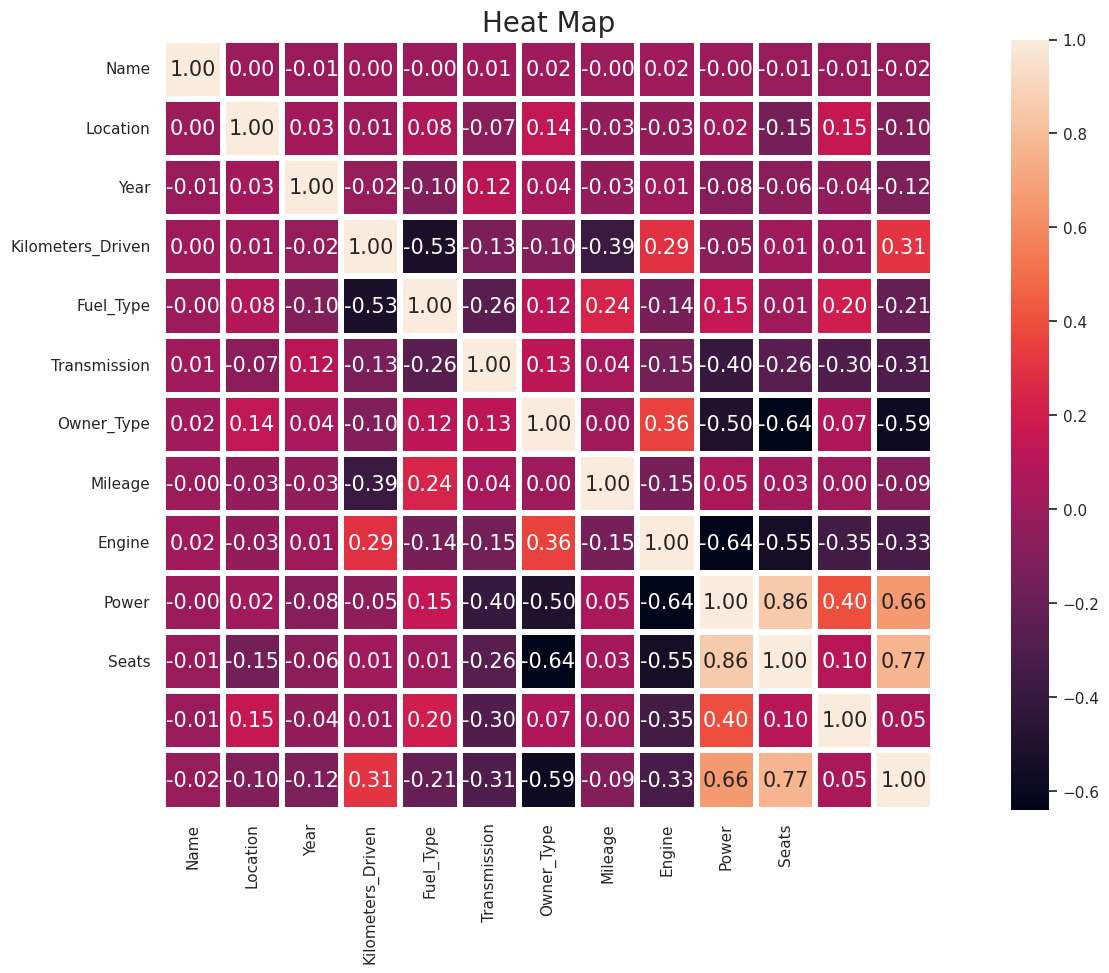

In [ ]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
plt.figure(figsize=(20,10))
plt.title('Heat Map', fontsize=20)
sns.set(font_scale=1.0)
sns.heatmap(train.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols, linewidth=3)

**Evalution:**

Model 1: LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
train = train.drop(columns = ['New_Price'])
train = train.drop(columns = ['Unnamed: 0'])

In [ ]:
x_lr = train.iloc[:, :-1].values
y_lr = train['Price'].values
xtrain_lr, xtest_lr, ytrain_lr, ytest_lr = train_test_split(x_lr, y_lr, test_size=0.3, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(xtrain_lr, ytrain_lr)

LinearRegression()

In [ ]:
ytrainpredict_lr = lr.predict(xtrain_lr)
ytestpredict_lr = lr.predict(xtest_lr)

Evaluating the model using accuracy metrics

In [ ]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_lr, ytrainpredict_lr)}, test: {metrics.mean_absolute_error(ytest_lr, ytestpredict_lr)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {np.sqrt(metrics.mean_squared_error(ytest_lr, ytestpredict_lr))}')
print(f'R^2 train: {(r2_score(ytrain_lr, ytrainpredict_lr))}, test: {(r2_score(ytest_lr, ytestpredict_lr))}')
print(f'MSE train: {(mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {(mean_squared_error(ytest_lr, ytestpredict_lr))}')

MAE train: 3.774559864499184, test: 3.5588136042797043
RMSE train: 6.287908025749571, test: 5.527333412719975
R^2 train: 0.6907902149844369, test: 0.7427342318417767
MSE train: 39.537787340285874, test: 30.55141465537065


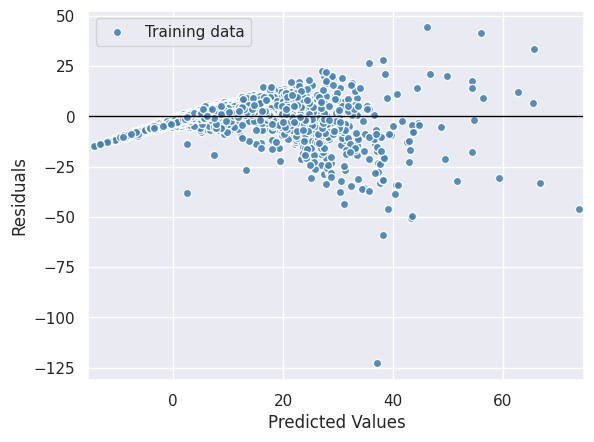

In [ ]:
sns.set(font_scale=1.0)
plt.scatter(ytrainpredict_lr, ytrainpredict_lr - ytrain_lr, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_lr.min()-2, xmax=ytrainpredict_lr.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_lr.min()-1, ytrainpredict_lr.max()+1])
plt.show()

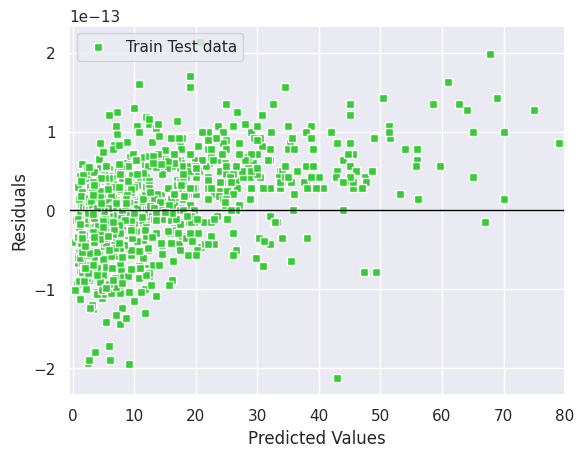

In [ ]:
plt.scatter(ytestpredict_lr, ytestpredict_lr-ytest_lr, c='limegreen', marker='s', edgecolors='white', s=30, alpha=0.99, label="Train Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_lr.min()-1, xmax=ytestpredict_lr.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_lr.min()-1, ytestpredict_lr.max()+1])
plt.show()

In [ ]:
print(lr.intercept_)

-1.0480505352461478e-13


In [ ]:
print(train.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Kilometers_Driven_log', 'Price_log'],
      dtype='object')


In [ ]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(lr.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000137
Location,-0.237382
Year,0.758469
Kilometers_Driven,-0.001637
Fuel_Type,-0.997015
Transmission,-2.444360
Owner_Type,-0.010903
Mileage,-0.148774
Engine,0.001103
Power,0.122569


Model 2 : LINEAR REGRESSION (REMOVING OUTLIERS)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

In [ ]:
ransac = RANSACRegressor(LinearRegression(), max_trials =100, min_samples=4213, loss='absolute_loss', residual_threshold=5.0, random_state=0)

In [ ]:
x_r = train.iloc[:, :-1].values
y_r = train['Price'].values
xtrain_r, xtest_r, ytrain_r, ytest_r = train_test_split(x_r, y_r, test_size=0.3, random_state=1)
ransac.fit(xtrain_r, ytrain_r)
inlier = ransac.inlier_mask_
inlier.size

InvalidParameterError: ignored

In [ ]:
lr = LinearRegression()
lr.fit(xtrain_r[inlier], ytrain_lr[inlier])
ytrainpredict_lr = lr.predict(xtrain_lr)
ytestpredict_lr = lr.predict(xtest_lr)

NameError: ignored

In [ ]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_lr, ytrainpredict_lr)}, test: {metrics.mean_absolute_error(ytest_lr, ytestpredict_lr)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {np.sqrt(metrics.mean_squared_error(ytest_lr, ytestpredict_lr))}')
print(f'R^2 train: {(r2_score(ytrain_lr, ytrainpredict_lr))}, test: {(r2_score(ytest_lr, ytestpredict_lr))}')
print(f'MSE train: {(mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {(mean_squared_error(ytest_lr, ytestpredict_lr))}')

MAE train: 3.774559864499184, test: 3.5588136042797043
RMSE train: 6.287908025749571, test: 5.527333412719975
R^2 train: 0.6907902149844369, test: 0.7427342318417767
MSE train: 39.537787340285874, test: 30.55141465537065


2. LINEAR REGRESSION (RIDGE REGRESSION)

In [ ]:
from sklearn.linear_model import Ridge

x_rd = train.iloc[:, :-1].values
y_rd = train['Price'].values
xtrain_rd, xtest_rd, ytrain_rd, ytest_rd = train_test_split(x_rd, y_rd, test_size=0.3, random_state=1)
rd = Ridge(alpha=1.0)
rd.fit(xtrain_rd, ytrain_rd)
ytrainpredict_rd = rd.predict(xtrain_rd)
ytestpredict_rd = rd.predict(xtest_rd)

In [ ]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_rd, ytrainpredict_rd)}, test: {metrics.mean_absolute_error(ytest_rd, ytestpredict_rd)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_rd, ytrainpredict_rd))}, test: {np.sqrt(metrics.mean_squared_error(ytest_rd, ytestpredict_rd))}')
print(f'R^2 train: {(r2_score(ytrain_rd, ytrainpredict_rd))}, test: {(r2_score(ytest_rd, ytestpredict_rd))}')
print(f'MSE train: {(mean_squared_error(ytrain_rd, ytrainpredict_rd))}, test: {(mean_squared_error(ytest_rd, ytestpredict_rd))}')

MAE train: 3.774588468693105, test: 3.558843993438384
RMSE train: 6.287908255693104, test: 5.52739325287998
R^2 train: 0.6907901923693506, test: 0.7427286613769921
MSE train: 39.53779023201349, test: 30.55207617198313


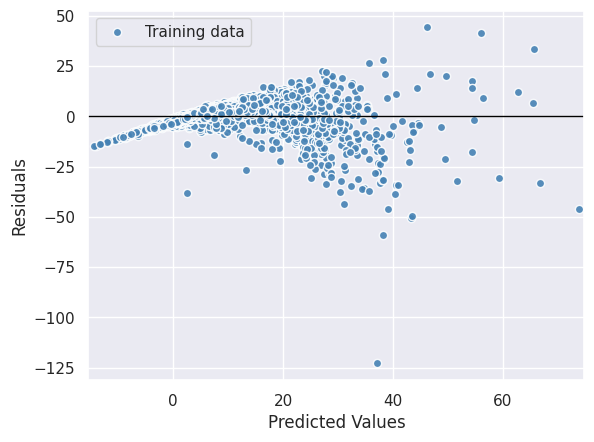

In [ ]:
plt.scatter(ytrainpredict_rd, ytrainpredict_rd-ytrain_rd, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rd.min()-2, xmax=ytrainpredict_rd.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rd.min()-1, ytrainpredict_rd.max()+1])
plt.show()

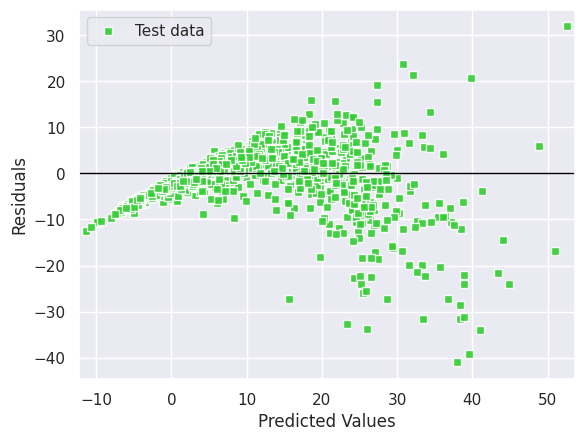

In [ ]:
plt.scatter(ytestpredict_rd, ytestpredict_rd-ytest_rd, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rd.min()-1, xmax=ytestpredict_rd.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rd.min()-1, ytestpredict_rd.max()+1])
plt.show()

In [ ]:
print(rd.intercept_)

0.07138524027417681


In [ ]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(rd.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000137
Location,-0.237386
Year,0.758493
Kilometers_Driven,-0.001637
Fuel_Type,-0.996910
Transmission,-2.439466
Owner_Type,-0.010856
Mileage,-0.148787
Engine,0.001102
Power,0.122601


3.LINEAR REGRESSION (LASSO)

In [ ]:
from sklearn.linear_model import Lasso

x_ls = train.iloc[:, :-1].values
y_ls = train['Price'].values
xtrain_ls, xtest_ls, ytrain_ls, ytest_ls = train_test_split(x_ls, y_ls, test_size=0.3, random_state=1)
ls = Ridge(alpha=1.0)
ls.fit(xtrain_rd, ytrain_ls)
ytrainpredict_ls = rd.predict(xtrain_ls)
ytestpredict_ls = rd.predict(xtest_ls)

In [ ]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_ls, ytrainpredict_ls)}, test: {metrics.mean_absolute_error(ytest_ls, ytestpredict_ls)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_ls, ytrainpredict_ls))}, test: {np.sqrt(metrics.mean_squared_error(ytest_ls, ytestpredict_ls))}')
print(f'R^2 train: {(r2_score(ytrain_ls, ytrainpredict_ls))}, test: {(r2_score(ytest_ls, ytestpredict_ls))}')
print(f'MSE train: {(mean_squared_error(ytrain_ls, ytrainpredict_ls))}, test: {(mean_squared_error(ytest_ls, ytestpredict_ls))}')

MAE train: 3.774588468693105, test: 3.558843993438384
RMSE train: 6.287908255693104, test: 5.52739325287998
R^2 train: 0.6907901923693506, test: 0.7427286613769921
MSE train: 39.53779023201349, test: 30.55207617198313


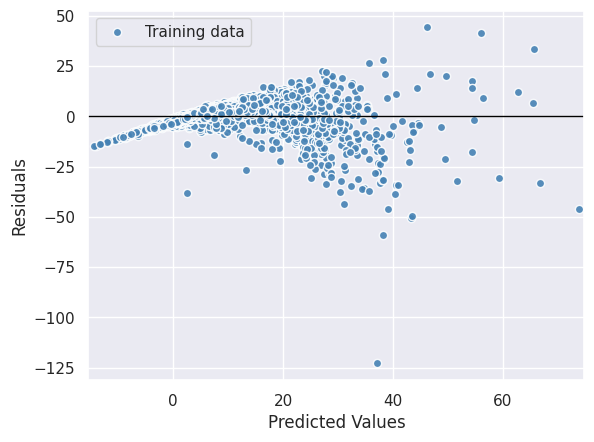

In [ ]:
plt.scatter(ytrainpredict_ls, ytrainpredict_ls-ytrain_ls, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_ls.min()-2, xmax=ytrainpredict_ls.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_ls.min()-1, ytrainpredict_ls.max()+1])
plt.show()

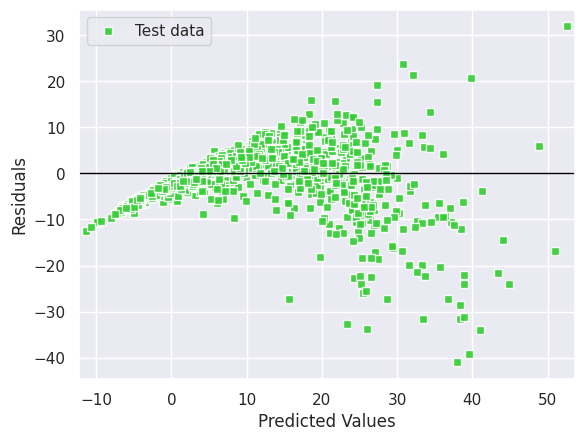

In [ ]:
plt.scatter(ytestpredict_ls, ytestpredict_ls-ytest_ls, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_ls.min()-1, xmax=ytestpredict_ls.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_ls.min()-1, ytestpredict_ls.max()+1])
plt.show()

In [ ]:
print(ls.intercept_)

0.07138524027417681


In [ ]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(ls.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000137
Location,-0.237386
Year,0.758493
Kilometers_Driven,-0.001637
Fuel_Type,-0.996910
Transmission,-2.439466
Owner_Type,-0.010856
Mileage,-0.148787
Engine,0.001102
Power,0.122601


4. RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x_rf = train.iloc[:, :-1].values
y_rf = train['Price'].values
xtrain_rf, xtest_rf, ytrain_rf, ytest_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=1)

forest_rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest_rf.fit(xtrain_rf, ytrain_rf)
ytrainpredict_rf = forest_rf.predict(xtrain_rf)
ytestpredict_rf = forest_rf.predict(xtest_rf)

InvalidParameterError: ignored

In [ ]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_rf, ytrainpredict_rf)}, test: {metrics.mean_absolute_error(ytest_rf, ytestpredict_rf)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {np.sqrt(metrics.mean_squared_error(ytest_rf, ytestpredict_rf))}')
print(f'R^2 train: {(r2_score(ytrain_rf, ytrainpredict_rf))}, test: {(r2_score(ytest_rf, ytestpredict_rf))}')
print(f'MSE train: {(mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {(mean_squared_error(ytest_rf, ytestpredict_rf))}')

NameError: ignored

KNN:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x_kk = train.iloc[:, :-1].values
y_kk = train['Price'].values
xtrain_kk, xtest_kk, ytrain_kk, ytest_kk = train_test_split(x_kk, y_kk, test_size=0.3, random_state=1)
L=[];
for i in range(3,15,2):
    M=[];
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain_kk, ytrain_kk)
    y_pred = knn.predict(xtest_kk)
    rmse = np.sqrt(mean_squared_error(ytest_kk, y_pred))
    M.append(i);
    M.append(rmse);
    L.append(M);

In [ ]:
min=L[0];
for i in range(len(L)):
    if L[i][1]<min[1]:
        min=L[i];
n=min[0];
print(n);

3


In [ ]:
knn = KNeighborsRegressor(n_neighbors=n)
knn.fit(xtrain_kk, ytrain_kk)
ytrainpredict_kk = knn.predict(xtrain_kk)
ytestpredict_kk = knn.predict(xtest_kk)


In [ ]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_kk, ytrainpredict_kk)}, test: {metrics.mean_absolute_error(ytest_kk, ytestpredict_kk)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {np.sqrt(metrics.mean_squared_error(ytest_kk, ytestpredict_kk))}')
print(f'R^2 train: {(r2_score(ytrain_kk, ytrainpredict_kk))}, test: {(r2_score(ytest_kk, ytestpredict_kk))}')
print(f'MSE train: {(mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {(mean_squared_error(ytest_kk, ytestpredict_kk))}')

MAE train: 2.244829496004431, test: 2.9696105574012552
RMSE train: 4.545716374556747, test: 5.576385957167967
R^2 train: 0.838398444275328, test: 0.7381477392627835
MSE train: 20.663537357913338, test: 31.09608034330011


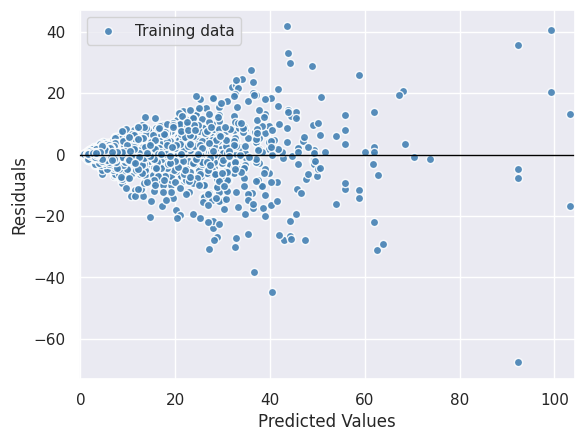

In [ ]:
plt.scatter(ytrainpredict_kk, ytrainpredict_kk-ytrain_kk, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_kk.min()-2, xmax=ytrainpredict_kk.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_kk.min()-1, ytrainpredict_kk.max()+1])
plt.show()

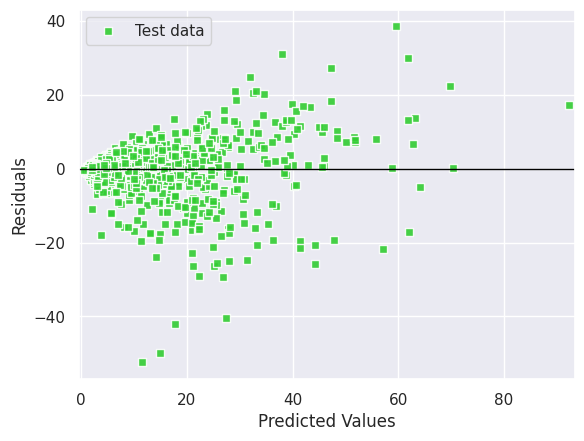

In [ ]:
plt.scatter(ytestpredict_kk, ytestpredict_kk-ytest_kk, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_kk.min()-1, xmax=ytestpredict_kk.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_kk.min()-1, ytestpredict_kk.max()+1])
plt.show()

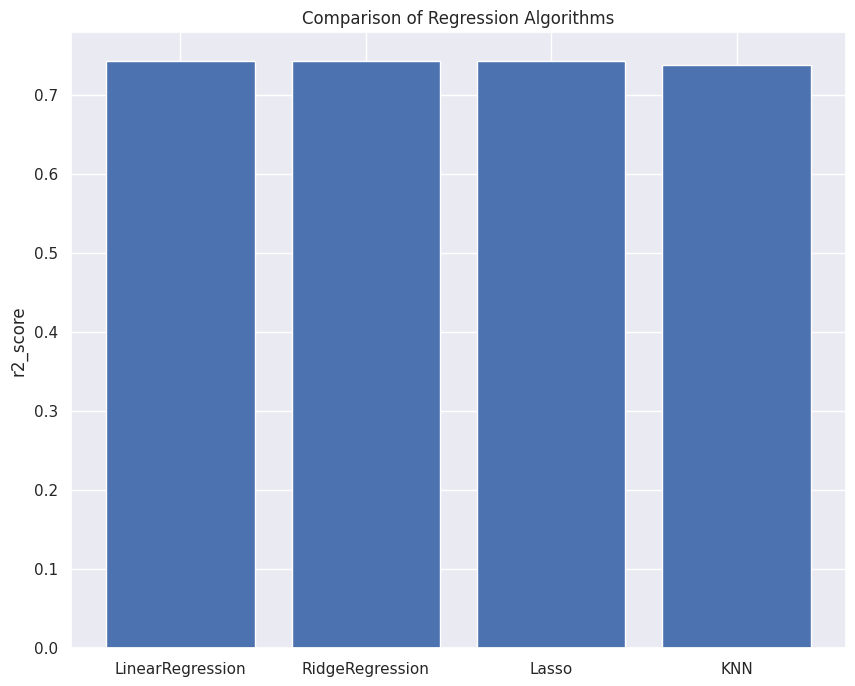

In [ ]:
plt.figure(figsize=(10,8))
y = np.array([r2_score(ytest_lr,ytestpredict_lr),r2_score(ytest_rd,ytestpredict_rd),r2_score(ytest_ls,ytestpredict_ls),r2_score(ytest_kk,ytestpredict_kk)])
x = ["LinearRegression","RidgeRegression","Lasso","KNN"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()

**Prediction:**


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   float64
 2   Location           1234 non-null   float64
 3   Year               1234 non-null   float64
 4   Kilometers_Driven  1234 non-null   float64
 5   Fuel_Type          1234 non-null   float64
 6   Transmission       1234 non-null   float64
 7   Owner_Type         1234 non-null   float64
 8   Mileage            1234 non-null   float64
 9   Engine             1234 non-null   float64
 10  Power              1234 non-null   float64
 11  Seats              1234 non-null   float64
 12  New_Price          1234 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 125.5+ KB


In [ ]:
test = test.drop(columns = ['New_Price'])
test = test.drop(columns = ['Unnamed: 0'])

KNN Regression Model has been used for predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

In [ ]:
x_testdata_rf = test.iloc[:, :].values
ytestpredict_rf = knn.predict(x_testdata_rf)
test["Predicted Price(KNN)"] = ytestpredict_rf
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price(KNN)
0,963.0,0.0,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,5.116667
1,953.0,0.0,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,5.116667
2,0.0,0.0,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,4.000000
3,1720.0,0.0,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,5.950000
4,759.0,0.0,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,4.016667
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,0.0,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,5.566667
1230,1829.0,0.0,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,5.566667
1231,1379.0,0.0,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,5.566667
1232,1829.0,0.0,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,5.566667
